# Predicting Bank Customer Attrition
By Lance Belen

<h2><u>Data Retrieval and Preparation</u></h2>

In [1]:
import pandas as pd
df = pd.read_csv("BankChurners.csv")
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [2]:
df.shape

(10127, 23)

In [3]:
df.dtypes

CLIENTNUM                                                                                                                               int64
Attrition_Flag                                                                                                                         object
Customer_Age                                                                                                                            int64
Gender                                                                                                                                 object
Dependent_count                                                                                                                         int64
Education_Level                                                                                                                        object
Marital_Status                                                                                                                         object
Income

<h3><i>Data Pre-Processing</i></h3>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df_cleaned = df.copy()
df_cleaned = df_cleaned.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1)
df_cleaned.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


<h4><u>Remove outliers</u></h4>

In [6]:
for col in df_cleaned.columns:
    if df[col].dtype == 'int':
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1
        threshold = 1.5
        outliers = df_cleaned[(df_cleaned[col] < Q1 - threshold * IQR) | (df_cleaned[col] > Q3 + threshold * IQR)]
        df_cleaned = df_cleaned.drop(outliers.index)
        print(f'Dropped {len(outliers)} outliers in {col}.')

Dropped 0 outliers in CLIENTNUM.
Dropped 2 outliers in Customer_Age.
Dropped 0 outliers in Dependent_count.
Dropped 385 outliers in Months_on_book.
Dropped 0 outliers in Total_Relationship_Count.
Dropped 308 outliers in Months_Inactive_12_mon.
Dropped 584 outliers in Contacts_Count_12_mon.
Dropped 0 outliers in Total_Revolving_Bal.
Dropped 808 outliers in Total_Trans_Amt.
Dropped 0 outliers in Total_Trans_Ct.


<h4><u>Check for missing values</u></h4>

In [7]:
if (len(df_cleaned[df_cleaned[col].isnull() == True]) > 0):
    print(f'Missing value/s found!')
else:
    print('No missing value/s!')

No missing value/s!


<h4><u>Rename ambiguous columns</u></h4>

In [8]:
df_cleaned=df_cleaned.rename(
    columns={
        'Months_Inactive_12_mon': 'Months_Inactive_Past_12_Months',
        'Contacts_Count_12_mon': 'Contacts_Count_Past_12_Months',
        'Total_Revolving_Bal': 'Total_Revolving_Balance',
        'Total_Amt_Chng_Q4_Q1': 'Transaction_Amt_Change_Q4_over_Q1',
        'Total_Trans_Amt': 'Total_Transaction_Amount',
        'Total_Trans_Ct': 'Total_Transaction_Count',
        'Total_Ct_Chng_Q4_Q1': 'Transaction_Count_Change_Q4_over_Q1',
    }
)

<h4><u>Export dataset for analysis and visualisation</u></h4>

In [9]:
df_cleaned.to_excel('BankChurnersCleaned.xlsx')

<h2><u>Data Exploration</u></h2>

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df_cleaned.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_Past_12_Months,Contacts_Count_Past_12_Months,Credit_Limit,Total_Revolving_Balance,Avg_Open_To_Buy,Transaction_Amt_Change_Q4_over_Q1,Total_Transaction_Amount,Total_Transaction_Count,Transaction_Count_Change_Q4_over_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,...,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066


In [12]:
df_cleaned.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_Past_12_Months,Contacts_Count_Past_12_Months,Credit_Limit,Total_Revolving_Balance,Avg_Open_To_Buy,Transaction_Amt_Change_Q4_over_Q1,Total_Transaction_Amount,Total_Transaction_Count,Transaction_Count_Change_Q4_over_Q1,Avg_Utilization_Ratio
count,8.040000e+03,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000
mean,7.386608e+08,46.338806,2.408209,35.907214,3.932214,2.268035,2.512562,8162.550896,1147.994900,7014.555995,0.753408,3537.054851,61.398383,0.708008,0.284044
std,3.649297e+07,7.445478,1.271965,6.991000,1.512483,0.858823,0.927442,8803.717930,815.958232,8815.469105,0.220990,1676.852012,20.058525,0.243195,0.280200
min,7.080833e+08,26.000000,0.000000,18.000000,1.000000,1.000000,1.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130428e+08,41.000000,2.000000,32.000000,3.000000,2.000000,2.000000,2447.000000,159.000000,1179.000000,0.621000,2077.000000,44.000000,0.571000,0.008750
50%,7.178284e+08,46.000000,2.000000,36.000000,4.000000,2.000000,3.000000,4198.500000,1257.000000,3123.000000,0.728000,3736.500000,65.000000,0.694000,0.187000
75%,7.725820e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,10080.500000,1769.000000,8990.500000,0.855000,4542.000000,78.000000,0.821000,0.522000
max,8.283431e+08,68.000000,5.000000,53.000000,6.000000,4.000000,4.000000,34516.000000,2517.000000,34516.000000,2.675000,8620.000000,113.000000,3.714000,0.999000


In [13]:
df_cleaned['Attrition_Flag'].value_counts()

Attrition_Flag
Existing Customer    6703
Attrited Customer    1337
Name: count, dtype: int64

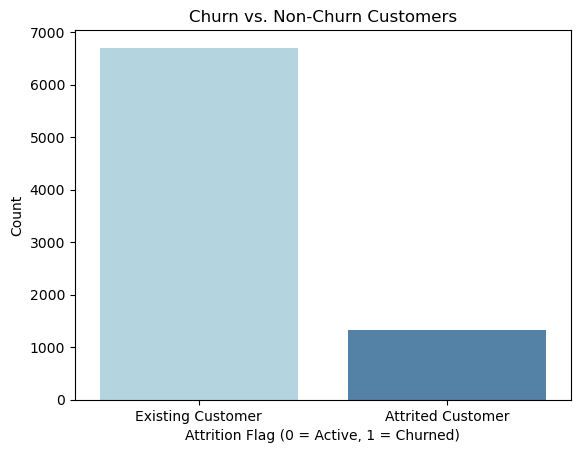

In [14]:
sns.countplot(x='Attrition_Flag', data=df_cleaned, hue='Attrition_Flag', palette=['lightblue', 'steelblue'])
plt.title("Churn vs. Non-Churn Customers")
plt.xlabel("Attrition Flag (0 = Active, 1 = Churned)")
plt.ylabel("Count")
plt.show()

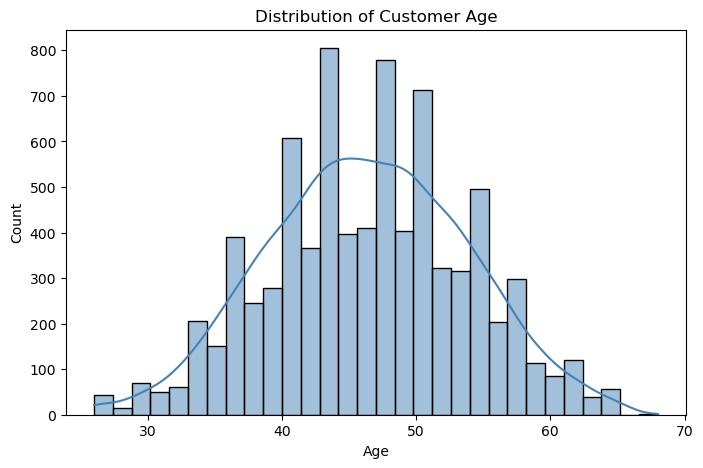

In [15]:
plt.figure(figsize=(8,5))
sns.histplot(df_cleaned['Customer_Age'], bins=30, kde=True, color="steelblue")
plt.title("Distribution of Customer Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

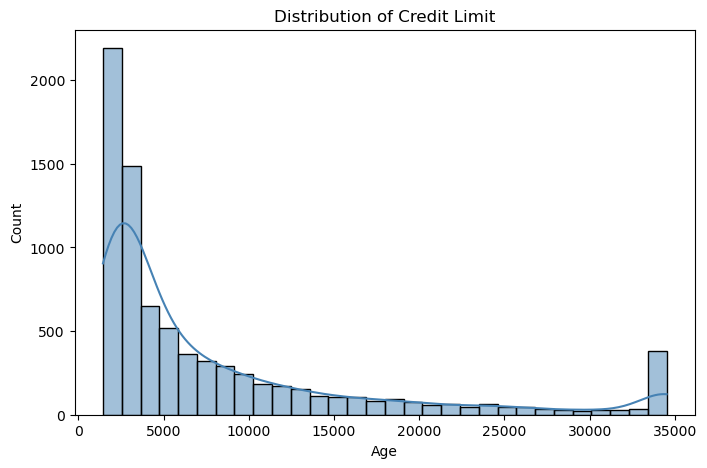

In [45]:
plt.figure(figsize=(8,5))
sns.histplot(df_cleaned['Credit_Limit'], bins=30, kde=True, color="steelblue")
plt.title("Distribution of Credit Limit")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

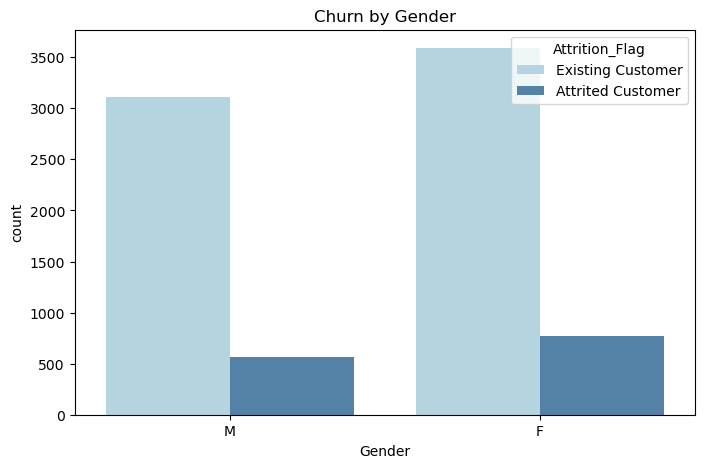

In [17]:
plt.figure(figsize=(8,5))
sns.countplot(x='Gender', hue='Attrition_Flag', data=df_cleaned, palette=['lightblue', 'steelblue'])
plt.title("Churn by Gender")
plt.show()

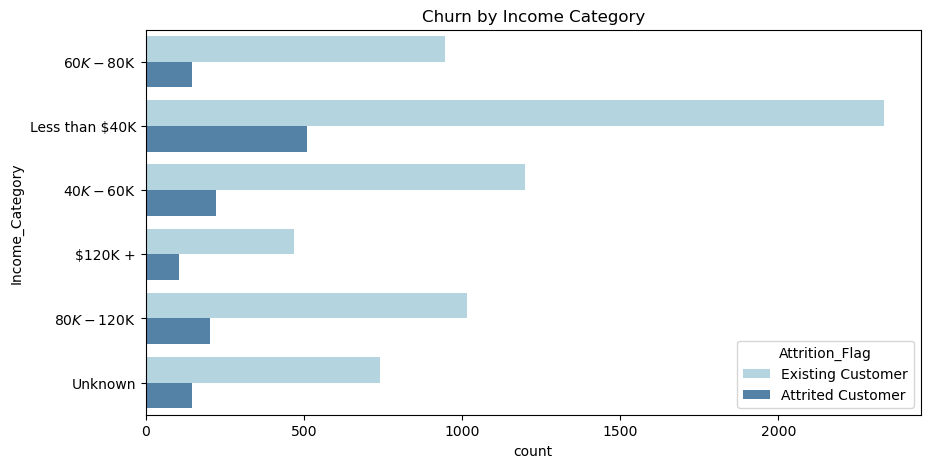

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(y='Income_Category', hue='Attrition_Flag', data=df_cleaned, palette=['lightblue', 'steelblue'])
plt.title("Churn by Income Category")
plt.show()

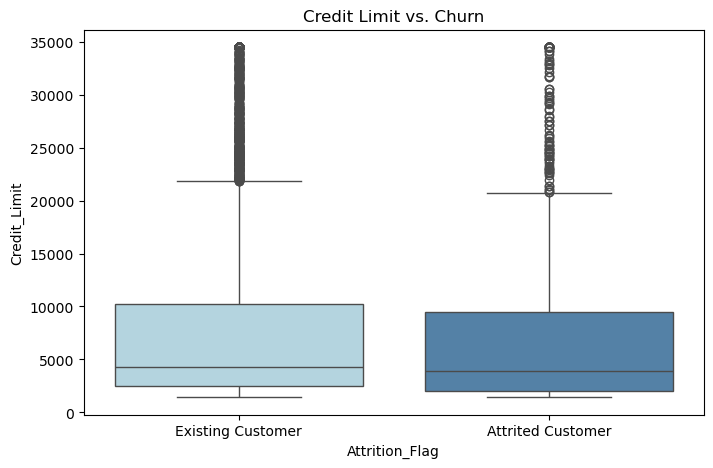

In [19]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Attrition_Flag', y='Credit_Limit', data=df_cleaned, hue='Attrition_Flag', palette=['lightblue', 'steelblue'])
plt.title("Credit Limit vs. Churn")
plt.show()

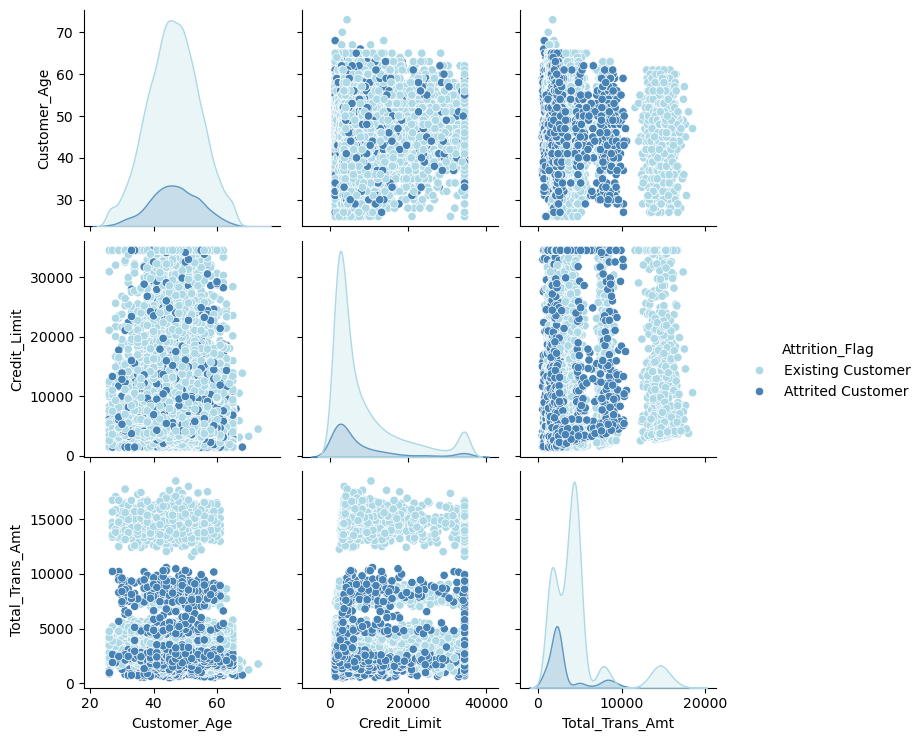

In [20]:
sns.pairplot(df[['Customer_Age', 'Credit_Limit', 'Total_Trans_Amt', 'Attrition_Flag']], 
             hue="Attrition_Flag", palette=['lightblue', 'steelblue'])
plt.show()

<h2><u>Data Modelling</u></h2>

<h3><i>Defining Features and Target Variable</i></h3>

In [21]:
X = df_cleaned.drop(columns=['Attrition_Flag'])
y = df_cleaned['Attrition_Flag']

In [22]:
X

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_Past_12_Months,Contacts_Count_Past_12_Months,Credit_Limit,Total_Revolving_Balance,Avg_Open_To_Buy,Transaction_Amt_Change_Q4_over_Q1,Total_Transaction_Amount,Total_Transaction_Count,Transaction_Count_Change_Q4_over_Q1,Avg_Utilization_Ratio
0,768805383,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
3,769911858,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
5,713061558,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
6,810347208,51,M,4,Unknown,Married,$120K +,Gold,46,6,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10067,717390408,49,F,4,Uneducated,Married,$40K - $60K,Blue,36,5,2,3,4167.0,0,4167.0,0.581,7590,87,0.776,0.000
10089,720328983,52,F,5,Unknown,Married,Less than $40K,Blue,36,4,3,3,9611.0,0,9611.0,0.840,7636,64,0.829,0.000
10103,717185658,51,M,1,High School,Married,$80K - $120K,Blue,36,4,3,4,22754.0,0,22754.0,0.799,8531,77,0.791,0.000
10119,716893683,55,F,3,Uneducated,Single,Unknown,Blue,47,4,3,3,14657.0,2517,12140.0,0.166,6009,53,0.514,0.172


In [23]:
y

0        Existing Customer
1        Existing Customer
3        Existing Customer
5        Existing Customer
6        Existing Customer
               ...        
10067    Attrited Customer
10089    Attrited Customer
10103    Attrited Customer
10119    Attrited Customer
10125    Attrited Customer
Name: Attrition_Flag, Length: 8040, dtype: object

<h3><i>One-Hot Encoding</i></h3>

In [24]:
X = pd.get_dummies(X, drop_first=True)
X

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_Past_12_Months,Contacts_Count_Past_12_Months,Credit_Limit,Total_Revolving_Balance,Avg_Open_To_Buy,...,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,768805383,45,3,39,5,1,3,12691.0,777,11914.0,...,False,False,False,True,False,False,False,False,False,False
1,818770008,49,5,44,6,1,2,8256.0,864,7392.0,...,True,False,False,False,False,True,False,False,False,False
3,769911858,40,4,34,3,4,1,3313.0,2517,796.0,...,False,True,False,False,False,True,False,False,False,False
5,713061558,44,2,36,3,1,2,4010.0,1247,2763.0,...,False,False,True,False,False,False,False,False,False,False
6,810347208,51,4,46,6,1,3,34516.0,2264,32252.0,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10067,717390408,49,4,36,5,2,3,4167.0,0,4167.0,...,False,False,True,False,False,False,False,False,False,False
10089,720328983,52,5,36,4,3,3,9611.0,0,9611.0,...,False,False,False,False,False,True,False,False,False,False
10103,717185658,51,1,36,4,3,4,22754.0,0,22754.0,...,False,False,False,False,True,False,False,False,False,False
10119,716893683,55,3,47,4,3,3,14657.0,2517,12140.0,...,True,False,False,False,False,False,True,False,False,False


<h3><i>Train-Test Split</i></h3>

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [27]:
X_train

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_Past_12_Months,Contacts_Count_Past_12_Months,Credit_Limit,Total_Revolving_Balance,Avg_Open_To_Buy,...,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
64,708155733,53,2,44,4,2,2,14734.0,1634,13100.0,...,True,False,False,False,False,False,False,False,False,False
2889,718785483,38,1,29,6,3,3,34516.0,1435,33081.0,...,True,False,False,False,True,False,False,False,False,True
6739,708606633,56,3,44,6,3,4,1544.0,0,1544.0,...,False,False,True,False,False,False,False,False,False,False
1680,795237183,51,2,45,3,2,4,5930.0,0,5930.0,...,False,False,True,False,False,False,False,False,False,False
4398,718072758,51,2,45,5,2,1,3173.0,2517,656.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2776,721023708,47,4,36,3,3,3,17557.0,0,17557.0,...,False,False,False,True,False,False,False,False,False,False
7919,716673258,60,1,36,1,1,3,2347.0,1488,859.0,...,True,False,False,False,False,True,False,False,False,False
4122,780068283,53,1,38,4,3,3,1891.0,922,969.0,...,True,False,False,False,False,False,False,False,False,False
6952,716709858,34,1,25,1,2,3,3074.0,0,3074.0,...,False,True,False,False,False,True,False,False,False,False


In [28]:
X_test

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_Past_12_Months,Contacts_Count_Past_12_Months,Credit_Limit,Total_Revolving_Balance,Avg_Open_To_Buy,...,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
636,713580633,46,3,32,6,2,3,11477.0,0,11477.0,...,False,False,True,False,False,False,False,False,False,False
6947,714418983,43,5,33,4,2,1,1438.3,0,1438.3,...,True,False,True,False,False,False,False,False,False,False
600,816596583,45,2,40,6,3,1,11710.0,693,11017.0,...,False,False,False,False,True,False,False,False,False,False
8563,713213133,36,2,36,2,2,1,6763.0,1660,5103.0,...,True,False,True,False,False,False,False,False,False,False
4851,780201633,41,3,31,4,3,2,5655.0,1154,4501.0,...,True,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4980,751422258,45,4,38,6,3,2,5583.0,0,5583.0,...,False,False,False,False,False,True,False,False,False,False
2556,712784058,45,2,36,6,4,3,17156.0,2517,14639.0,...,False,False,False,False,False,False,True,False,False,False
2835,712401033,36,1,23,4,3,1,1438.3,928,510.3,...,True,False,False,False,False,True,False,False,False,False
1025,713053383,42,3,36,1,1,3,34516.0,781,33735.0,...,False,False,False,False,True,False,False,False,False,False


In [29]:
y_train

64      Existing Customer
2889    Existing Customer
6739    Attrited Customer
1680    Existing Customer
4398    Existing Customer
              ...        
2776    Existing Customer
7919    Existing Customer
4122    Existing Customer
6952    Attrited Customer
8491    Existing Customer
Name: Attrition_Flag, Length: 5628, dtype: object

In [30]:
y_test

636     Existing Customer
6947    Existing Customer
600     Existing Customer
8563    Existing Customer
4851    Attrited Customer
              ...        
4980    Existing Customer
2556    Attrited Customer
2835    Existing Customer
1025    Attrited Customer
3856    Existing Customer
Name: Attrition_Flag, Length: 2412, dtype: object

<h3><i>Feature Scaling for Logistic Regression</i></h3>

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<h3><i>Train Models</i></h3>

<h4><u>Logistic Regression</u></h4>

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_reg = LogisticRegression(max_iter=250)
log_reg.fit(X_train_scaled, y_train)

y_pred_log = log_reg.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))

Logistic Regression Accuracy: 0.9038142620232172


<h4><u>Decision Tree</h4>

In [33]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

Decision Tree Accuracy: 0.9286898839137645


<h4><u>XGBoost</u></h4>

In [34]:
from xgboost import XGBClassifier

y_train_xgb = y_train.map({'Attrited Customer': 1, 'Existing Customer': 0})
y_test_xgb = y_test.map({'Attrited Customer': 1, 'Existing Customer': 0})

xgb = XGBClassifier(eval_metric='logloss')
xgb.fit(X_train, y_train_xgb)

y_pred_xgb = xgb.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test_xgb, y_pred_xgb))

XGBoost Accuracy: 0.9626865671641791


<h3><i>Model Evaluation</i></h3>

In [35]:
from sklearn.metrics import classification_report, roc_auc_score

print("Logistic Regression:\n", classification_report(y_test, y_pred_log))
print("-------------------------------------------------------------")
print("Decision Tree:\n", classification_report(y_test, y_pred_dt))
print("-------------------------------------------------------------")
print("XGBoost:\n", classification_report(y_test_xgb, y_pred_xgb))
print("XGBoost ROC-AUC Score:", roc_auc_score(y_test_xgb, y_pred_xgb))

Logistic Regression:
                    precision    recall  f1-score   support

Attrited Customer       0.75      0.63      0.68       401
Existing Customer       0.93      0.96      0.94      2011

         accuracy                           0.90      2412
        macro avg       0.84      0.79      0.81      2412
     weighted avg       0.90      0.90      0.90      2412

-------------------------------------------------------------
Decision Tree:
                    precision    recall  f1-score   support

Attrited Customer       0.80      0.76      0.78       401
Existing Customer       0.95      0.96      0.96      2011

         accuracy                           0.93      2412
        macro avg       0.88      0.86      0.87      2412
     weighted avg       0.93      0.93      0.93      2412

-------------------------------------------------------------
XGBoost:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      2011
     

<h3><i>Model Improvement - XGBoost</i></h3>

<h4>Feature Engineering</h4>

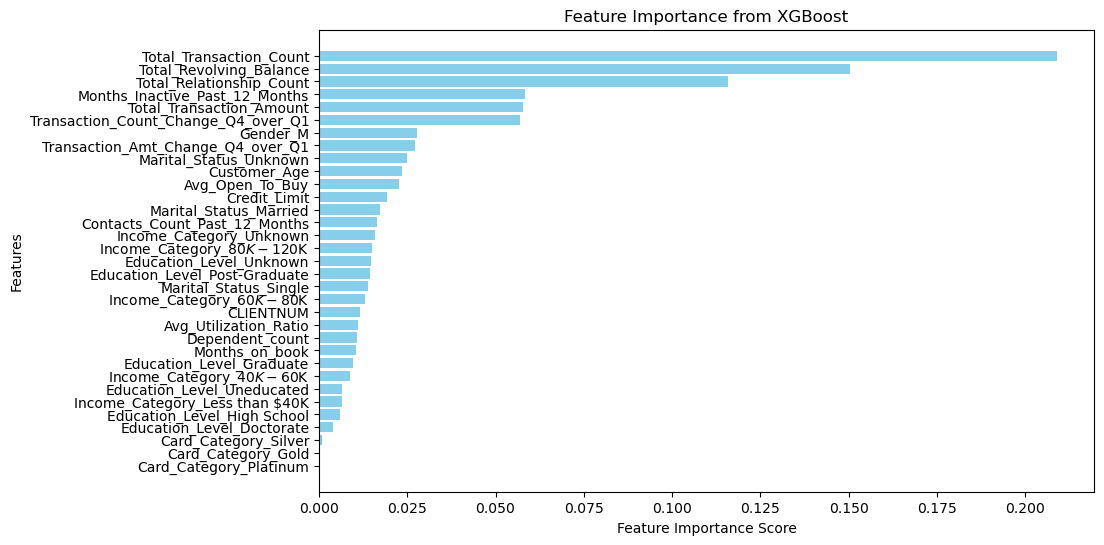

In [36]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importance from trained XGBoost model
feature_importance = xgb.feature_importances_

# Create a DataFrame to sort & visualize
feature_imp_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
feature_imp_df = feature_imp_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10,6))
plt.barh(feature_imp_df['Feature'], feature_imp_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance from XGBoost")
plt.gca().invert_yaxis()  # Flip to show the highest at the top
plt.show()

In [37]:
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier

xgb = XGBClassifier(eval_metric='logloss')

selector = RFE(xgb, n_features_to_select=10)  # Keep top 10 features
selector.fit(X_train, y_train_xgb)

selected_features = X_train.columns[selector.support_]

print('SELECTED FEATURES:')
for feature in selected_features:
    print(feature)
print()

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

xgb.fit(X_train_selected, y_train_xgb)
y_pred_xgb = xgb.predict(X_test_selected)

print("XGBoost Accuracy after feature selection:", accuracy_score(y_test_xgb, y_pred_xgb))

SELECTED FEATURES:
Customer_Age
Total_Relationship_Count
Months_Inactive_Past_12_Months
Total_Revolving_Balance
Transaction_Amt_Change_Q4_over_Q1
Total_Transaction_Amount
Total_Transaction_Count
Transaction_Count_Change_Q4_over_Q1
Gender_M
Marital_Status_Married

XGBoost Accuracy after feature selection: 0.9631011608623549


<h4>Handling class imbalance</h4>

In [38]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

y_train_xgb = y_train.map({'Attrited Customer': 1, 'Existing Customer': 0})
y_test_xgb = y_test.map({'Attrited Customer': 1, 'Existing Customer': 0})

scale_pos_weight = y_train_xgb.value_counts()[0] / y_train_xgb.value_counts()[1]

xgb = XGBClassifier(eval_metric='logloss', scale_pos_weight=scale_pos_weight)

xgb.fit(X_train, y_train_xgb)

y_pred_xgb = xgb.predict(X_test)

print("XGBoost Accuracy after handling class imbalance:", accuracy_score(y_test_xgb, y_pred_xgb))

XGBoost Accuracy after handling class imbalance: 0.9664179104477612


<h4>Hyperparameter Tuning</h4>

In [39]:
import optuna
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'subsample': trial.suggest_float('subsample', 0.7, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.7, 1.0),
        'gamma': trial.suggest_float('gamma', 0.01, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.01, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 10.0),
        'scale_pos_weight': y_train_xgb.value_counts()[0] / y_train_xgb.value_counts()[1],  # Handle class imbalance
        'eval_metric': 'logloss'
    }
    
    # Train model
    model = XGBClassifier(**params)
    model.fit(X_train, y_train_xgb)
    
    # Predict on test set
    y_pred = model.predict(X_test)
    
    # Return accuracy as the metric to optimize
    return accuracy_score(y_test_xgb, y_pred)

# Run Optuna optimization
study = optuna.create_study(direction='maximize')  # Maximize accuracy
study.optimize(objective, n_trials=30)  # Run 30 trials

# Print best parameters
print(f"Best parameters: {study.best_params} \n")

best_xgb = XGBClassifier(**study.best_params)
best_xgb.fit(X_train, y_train_xgb)

y_pred_xgb = best_xgb.predict(X_test)

print("Optimized XGBoost Accuracy:", accuracy_score(y_test_xgb, y_pred_xgb))

[I 2025-02-16 21:12:21,411] A new study created in memory with name: no-name-e300f53b-9797-4f5f-b447-2bbefde6e026
[I 2025-02-16 21:12:21,515] Trial 0 finished with value: 0.9643449419568823 and parameters: {'n_estimators': 230, 'learning_rate': 0.11745752717321765, 'max_depth': 6, 'subsample': 0.8586304698765258, 'colsample_bytree': 0.9764618908183001, 'gamma': 0.5434160473096198, 'reg_alpha': 0.7971440867071511, 'reg_lambda': 1.927173296424222}. Best is trial 0 with value: 0.9643449419568823.
[I 2025-02-16 21:12:21,586] Trial 1 finished with value: 0.966832504145937 and parameters: {'n_estimators': 281, 'learning_rate': 0.1991774214970743, 'max_depth': 5, 'subsample': 0.9561043980478309, 'colsample_bytree': 0.7170510635938118, 'gamma': 0.9025831476279472, 'reg_alpha': 0.47722984169980515, 'reg_lambda': 3.1494336847816906}. Best is trial 1 with value: 0.966832504145937.
[I 2025-02-16 21:12:21,723] Trial 2 finished with value: 0.9643449419568823 and parameters: {'n_estimators': 199, 'le

Best parameters: {'n_estimators': 465, 'learning_rate': 0.11016874466730736, 'max_depth': 4, 'subsample': 0.7009040248829104, 'colsample_bytree': 0.9906023167621306, 'gamma': 0.6454730627854607, 'reg_alpha': 0.340138491236755, 'reg_lambda': 7.441561207192426} 

Optimized XGBoost Accuracy: 0.9651741293532339


<h3>K-Folds Cross-Validation</h3>

In [40]:
from sklearn.model_selection import KFold, cross_val_score

<h4>Logistic Regression</h4>

In [41]:
kf = KFold(n_splits=5, random_state=1, shuffle=True)
cv_scores = cross_val_score(log_reg, X_train, y_train, cv=kf, scoring='accuracy')
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Score: {cv_scores.mean():.3f}")

Cross-Validation Scores: [0.8330373  0.8294849  0.839254   0.84888889 0.84444444]
Mean Cross-Validation Score: 0.839


<h4>Decision Tree</h4>

In [42]:
kf = KFold(n_splits=5, random_state=1, shuffle=True)
cv_scores = cross_val_score(dt, X_train, y_train, cv=kf, scoring='accuracy')
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Score: {cv_scores.mean():.3f}")

Cross-Validation Scores: [0.92895204 0.92362345 0.94227353 0.93777778 0.93777778]
Mean Cross-Validation Score: 0.934


<h4>XGBoost</h4>

In [43]:
kf = KFold(n_splits=5, random_state=1, shuffle=True)
cv_scores = cross_val_score(xgb, X_train, y_train_xgb, cv=kf, scoring='accuracy')
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Score: {cv_scores.mean():.3f}")

Cross-Validation Scores: [0.96003552 0.96536412 0.96802842 0.96888889 0.96088889]
Mean Cross-Validation Score: 0.965


In [44]:
xgb.save_model('xgboost_model.json')